# Avaliação Final

NOME: João Alfredo Cardoso Lamy


E-MAIL: joaoacl@al.insper.edu.br

Esta é a A.F. de Álgebra Linear e Teoria da Informação de 1s2023.



INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material ou IA, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* O envio da prova será fechado às 17h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. As questões 1, 2, 3 e 4 têm peso igual a 2.5.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & 0 \\ 2 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

In [31]:
import numpy as np

x = np.array([[1.5,0],
              [2,0.5]])

w,v = np.linalg.eig(x)

print(v)

alpha = 1/v[0][1]

v2 = v * alpha

P = x@v 
P2 = x@v2

l = np.linalg.inv(v)@P
l2 = np.linalg.inv(v2)@P2

l2

[[0.         0.4472136 ]
 [1.         0.89442719]]


array([[ 5.00000000e-01, -5.55111512e-17],
       [ 0.00000000e+00,  1.50000000e+00]])

# Resposta do Exercício 1

Inicialmente, possuimos o vetor $X$, que tem os valores:

$$
X = \begin{bmatrix} 1.5 & 0 \\ 2 & 0.5 \end{bmatrix}
$$

Calculamos, então, seu autovetor e autovalor utilizando a função `np.linalg.eig(X)`. No final, temos que os autovetores de $X$ são:

$$
V = \begin{bmatrix} 
0 & 0.4472136 \\ 
1 & 0.89442719 
\end{bmatrix}
$$

Esses valores não parecem ser promissores para provar que o vetor coluna $v$ é realmente um autovetor de $X$, mas, podemos estar esquecendo de um fenômeno importante: um autovetor multiplicado por um $\alpha$ ainda é um autovetor:

O que quero dizer com isso pode ser descrito utilizando algumas fórmulas. Inicialmente, temos apenas a fórmula dos autovetores e autovalores. A matriz $A$ é nossa matriz original, $x$ representa nossos autovetores e $\lambda$ nossos autovalores:

$$

Ax = x\lambda

$$

Agora, vamos introduzir a matriz $y$. Ela é a seguinte:

$$
y = x\alpha
$$

Mesmo assim, a seguinte fórmula ainda é verdadeira:
$$

Ay = y\lambda

$$

Portanto:

$$
x^{-1}Ax = \lambda
$$
$$
y^{-1}Ay = \lambda
$$
$$
x^{-1}Ax = y^{-1}Ay 
$$

Meu código utiliza esse fenômeno para ver se $v$ é ou não um autovetor de $X$.

Para isso, necessitava de um $\alpha$. Infelizmente, não havia uma proporção de 1 para 1 em nenhuma das coluna da matriz de autovetores, então já era possível ver que $v$ não era um autovetor. Mesmo assim, escolhi um valor dos autovetores e realizei a seguinte operação para obter um alpha:

$$
\alpha = \frac{1}{0.4472136}
$$

Criei um vetor $V_2$, que é:

$$
V_{2} = V\alpha
$$

Finalmente, testei se a o processo de conseguir a matriz de autovalores retorna o mesmo resultado em ambos, ou seja:

$$
V^{-1}XV = \lambda _1
$$
$$
V_{2}^{-1}XV_{2} = \lambda _2
$$
$$
V^{-1}XV = V_{2}^{-1}XV_{2} 
$$
$$
\lambda _1 = \lambda _2
$$


No código, as saídas `l` e `l2` representam, respectivamente, $\lambda _1$ e $\lambda _2$.


O resultado não mostrou uma igualdade entre todos os valores dos $\lambda$, particularmente a variável `l2` do código, que não era uma matriz com autovetores nas diagonais e sim uma matriz que possui um valor não nulo no seu canto superior direito. Isso nos mostra que $V_2$ não é um autovetor de $X$, portanto, $v$ não é um autovetor de $X$.

# Exercício 2

Um possível modelo para o controle de doenças é o modelo SI (Suscetível - Infectado). Nesse modelo, uma pessoa pode estar ou suscetível ou infectada. Uma pessoa suscetível não tem a doença, mas pode contraí-la a qualquer momento. Uma pessoa infectada tem a doença, mas pode se recuperar.

A cada semana, uma pessoa suscetível tem uma probabilidade de continuar saudável e uma probabilidade de ficar infectada. Da mesma forma, uma pessoa que está infectada tem uma probabilidade de continuar infectada e uma probabilidade de se recuperar, voltando a estar suscetível.

Esse modelo foi aplicado para a doença (fictícia!) algelinite, que faz a pessoa doente ficar azul e cheia de bolinhas amarelas. Uma pessoa com algelininte não consegue trabalhar, nem estudar, nem se divertir. A pessoa com algelinite precisa de um leito de hospital até sua recuperação completa.

Através de pesquisas, cientistas determinaram que:, a cada semana:

* A probabilidade de uma pessoa suscetível se infectar com algelininte é $0.01$ (e, por consequência, a probabilidade de simplesmente continuar suscetível é $0.99$).
* A probabilidade de uma pessoa infectada se recuperar (se estiver num leito hospitalar) é $0.2$ (e, por consequência, a probabilidade de continuar doente é $0.8$).

Na cidade de São Paulo há 10 milhões de pessoas, inicialmente saudáveis. Quantos leitos de hospital são tipicamente necessários para controlar a algelininte na capital paulista ao longo de um tempo longo? Justifique sua resposta!

In [7]:
import numpy as np

# probabilidades descritas na questão acima (cada coluna representa uma classe de cidadão)
probabilidades = np.array([[0.99,0.2],
                           [0.01, 0.8]])

# número de habitantes em cada classe
habitantes = np.array([[10**7,0]]).T

# realizando o cálculo ao longo de 100 semanas
for _ in range(10000):
    habitantes = probabilidades @ habitantes

# printando os resultados
print(habitantes)
np.ceil(habitantes[1][0])

[[9523809.52380952]
 [ 476190.47619048]]


476191.0

# Resposta do Exercício 2
Este problema é um exemplo claro de matrizes de transiçao. Inicialmente temos uma matriz quadrada de $2\times 2$, cada coluna representa a classe atual de cidadão e cada linha representa a chance do cidadão ir para aquela classe. Para ilustrar o modelo, criei a tabela abaixo:

* S -> Suscetível
* I -> Infectado

|       | **S** | **I** |
|-------|-------|-------|
| **S** | 0.99  | 0.2   | 
| **I** | 0.01  | 0.8   | 

A matriz correpondente de $Probabilidades$ ou $P$ (para ser sucinto) ficaria da seguinte maneira:

$$
P = 
\begin{bmatrix}
    0.99 & 0.2 \\
    0.01 & 0.8 \\
\end{bmatrix}
$$

Os elementos da linha i e coluna j desta matriz representam a probabilidade de "sairmos" da situação da coluna e chegar no estado da linha.

Para checar quantos habitantes estariam infectados após um longo tempo, basta realizar o processo de multiplicação ($H = AH$) um grande número de vezes. Nossa matriz $H$ tem o número de habitantes em cada situação (infectado ou suscetível).

O número escolhido foi 100 vezes. Isso essencialmente significa que fizemos o processo descrito abaixo:

$$
H = P^{100}H
$$

Ao final, temos que, após 100 semanas, seriam necessários 47620 leitos hospitalares segundo os cálculos.

# Exercício 3

Um grupo de cientistas de dados coletou dados sobre os hábitos de estudo de alunos de uma sala de aula do ensino médio. Os dados coletados, para cada aluno, são a sua nota na prova final de Filosofia e o tempo que cada aluno passou estudando.

Os dados do tempo de estudo ($t$) e da nota da na prova ($y$) estão abaixo.

Embora os alunos tenham reclamado que a prova estava difícil, a coordenação da escola argumentou que está claro que, quanto maior o tempo de estudo, maior foi a nota na prova. Ainda, uma das diretrizes da escola diz que as provas são planejadas para que, com 4h de estudo, seja absolutamente factível tirar nota 8 na prova. A coordenção da escola diz que a nota, inclusive, pode ser predita com um modelo linear do tipo $y=at+b$.

Como representante da equipe de ciência de dados:

1. Argumente sobre se o modelo proposto pela coordenação é adequado para prever as notas dos alunos, e, se for o caso, proponha um modelo diferente,
1. Usando `autograd`, encontre os parâmetros do modelo que permite prever a nota com base no tempo de estudo,
1. Mostre uma figura com os pontos medidos sobrepostos a uma linha que evidencie as predições do modelo,
1. Usando os parâmetros do modelo que você escolheu, decida se é factível tirar nota 8 na prova com 4h de estudo.

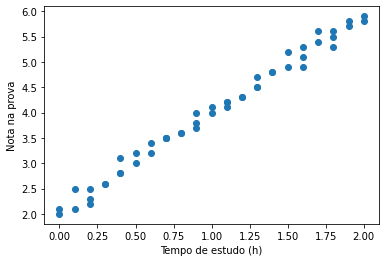

In [5]:
import matplotlib.pyplot as plt

t = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0]
y = [2.0, 2.1, 2.1, 2.5, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 3.1, 3.0, 3.2, 3.2, 3.4, 3.5, 3.5, 3.5, 3.6, 3.6, 3.7, 4.0, 3.8, 4.0, 4.1, 4.2, 4.2, 4.1, 4.3, 4.3, 4.5, 4.7, 4.5, 4.8, 4.8, 4.9, 5.2, 4.9, 5.1, 5.3, 5.4, 5.6, 5.5, 5.3, 5.6, 5.8, 5.7, 5.8, 5.9]

plt.figure()
plt.scatter(t,y)
plt.xlabel('Tempo de estudo (h)')
plt.ylabel('Nota na prova')
plt.show()

# Respostas

1. O modelo da coordenação, do ponto de vista teórico, faz sentido. Você vai aprendendo conforme você se dedica aos seus estudos. É claro que esse aprendizado não segue o mesmo formato para todos, mas é uma regra geral que é amplamente aceita e praticada por estudantes e professores. 

In [16]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def erro(param):
    a,b,n,t = param
    t_ = a*n + b
    return np_.mean((t_ - t)**2)

n = np.array(t)*1.0
alvo = np.array(y)*1.0

g = grad(erro)

A, B = 0.3, 0.5

alpha = 0.1

for _ in range(100):
    a_, b_, n_, alvo_ = g( (A, B, n, alvo) )
    A -= alpha*a_
    B -= alpha*b_

print(f"A = {A}\nB = {B}")

A = 1.9268113646269032
B = 2.0744070631827025


2. O código acima nos mostra que os parâmetros utilizados na fórmula $y = at+b$ deveriam ser:

$$
\hspace{0.5in}
a = 1.9268113646269032
\hspace{0.2in}
b = 2.0744070631827025
$$

Lembrando que $t$ é o tempo de estudo e $y$ a nota final.

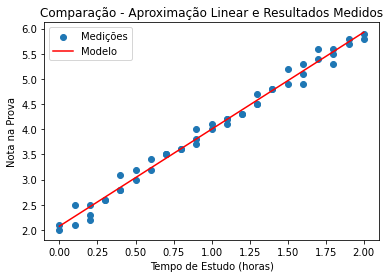

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Comparação - Aproximação Linear e Resultados Medidos")
plt.scatter(n,alvo, label='Medições')
plt.plot(n,A*n + B, color="r", label='Modelo')
plt.ylabel("Nota na Prova")
plt.xlabel("Tempo de Estudo (horas)")
plt.legend()
plt.show()

3. A figura *Comparação - Aproximação Linear e Resultados Medidos* nos mostra essa linha e os pontos que nos foram dados. Isso evidencia que o modelo linear se diz verdadeiro para esse caso, com a linha vermelha acompanhando o trajeto dos pontos com uma proximidade grande.

In [25]:
print("Nota do Aluno que estudou 4h:", A*4 + B)

Nota do Aluno que estudou 4h: 9.781652521690315


4. Acima, está um pequeno trecho de código que nos trás o resultado esperado de um aluno que estudou 4 horas antes da prova (segundo nosso modelo). O seu resultado é de aproximadamente 9.78, sendo mais de 1 ponto acima dos 8 que foram planejados segundo as diretrizes da escola. Desta maneira, é sim factível uma pessoa tirar 8 na prova após estudar por 4 horas, apesar disso, o mais provável é que sua nota seja maior ainda.

# Exercício 4

Após realizar a compressão de uma sequência com o Código de Huffman, obtemos a seguinte árvore:

<img src="arvore.png" />




1. Qual é a codificação da sequência: `ABBCBAAACD`?
1. Qual é a sequência cuja codificação é: `010110111111110100`?

# Resposta do Exercício 4
Primeiramente, iremos analisar letra a letra qual seria seu código de huffman. A tabela abaixo ajuda a ilustrar.

|       | **Código de Huffman** | 
|-------|-------|
| **A** | 0   | 
| **B** | 10  |
| **C** | 110 |
| **D** | 111 |

Agora, podemos responder com clareza as questões.

### 1 - Qual é a codificação da sequência: `ABBCBAAACD`?

A codificação da sequência `ABBCBAAACD` é:

* `0101011010000110111`

Isso fica nítido ao separarmos as letras individualmente, nos dando a sequência:

* `0 10 10 110 10 0 0 0 110 111`


### 2 - Qual é a sequência cuja codificação é: `010110111111110100`?

A sequência cuja codificação é `010110111111110100` é:

* `ABCDDCBA`

Isso fica nítido ao separarmos as letras individualmente, nos dando a sequência:

* `0 10 110 111 111 110 10 0`

#### Qualquer Dúvida -> Consulte a Tabela